<a href="https://colab.research.google.com/github/Lambda-School-Labs/bridges-to-prosperity-ds-d/blob/main/notebooks/b2p_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Imports
import numpy as np
import pandas as pd
from datetime import date
import re

In [61]:
# Load data
xl_file = pd.ExcelFile('https://github.com/Lambda-School-Labs/bridges-to-prosperity-ds-d/blob/main/Data/B2P%20Dataset_2020.10.xlsx?raw=true')
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
print(dfs.keys())
df = dfs['Data']

dict_keys(['Data', 'Data Dictionary', 'Contextual Summary'])


In [62]:
dfs['Data Dictionary']

,Field,Description (if not self-explanatory)
0,Bridge Name,NaN
1,Bridge Opportunity: Project Code,Unique ID
2,Bridge Opportunity: Needs Assessment,"This will be populated with ""Rwanda 2018 Needs..."
3,Bridge Opportunity: Level 1 Government,Province
4,Bridge Opportunity: Level 2 Government,District
5,Bridge Opportunity: Stage,Project status of this site as of 2020.10.26
6,Bridge Opportunity: GPS (Latitude),NaN
7,Bridge Opportunity: GPS (Longitude),NaN
8,Bridge Opportunity: Bridge Type,Type of standard bridge built or recommended
9,Bridge Opportunity: Span (m),The length of the bridge as determined by seni...


In [63]:
dfs['Contextual Summary']

,Problem 1: Parsing 2013/2014 needs assessment data into current fields,"300+ sites were initially identified as part of an informal needs assessment conducted by our Rwanda field staff over 2013 and 2014. We collected much of the same data that we do now, but in a less structured format. When we created the database in 2017, we loaded all the old needs assessment into the general comments field on each bridge record (column L in this table), just to keep as a reference. We now believe that loading this data into our standard project assessments would be a benefit to future needs assessment work, both field-based and remote. We would love to see the needs assessment data from Column L parsed into the corresponding columns after it (M+), with a new row if there is existing data in those columns. If no corresponding column is obvious, we'd like to see new columns created for any extraneous data that is common to the old format."
0,Problem 2: Predicting which sites will be tech...,"Any sites with a ""Yes"" in the column AQ have u..."


### Problem 1: Parsing 2013/2014 needs assessment data into current fields:
300+ sites were initially identified as part of an informal needs assessment conducted by our Rwanda field staff over 2013 and 2014. We collected much of the same data that we do now, but in a less structured format. When we created the database in 2017, we loaded all the old needs assessment into the general comments field on each bridge record (column L in this table), just to keep as a reference. We now believe that loading this data into our standard project assessments would be a benefit to future needs assessment work, both field-based and remote. We would love to see the needs assessment data from Column L parsed into the corresponding columns after it (M+), with a new row if there is existing data in those columns. If no corresponding column is obvious, we'd like to see new columns created for any extraneous data that is common to the old format. 

### Problem 2: Predicting which sites will be technically rejected in future engineering reviews:
Any sites with a "Yes" in the column AQ have undergone a full technical review, and of those, the Stage (column L) can be considered to be correct. Any sites with a "Yes" in Column AQ have not undergone a full technical review, and the Stage is based on the assessor's initial estimate as to whether the site was technically feasible or not. We want to know if we can use the sites that have been reviewed to understand which of the sites that haven't yet been reviewed are likely to be rejected by the senior engineering team. Any of the data can be used, but our guess is that Estimated Span, Height Differential Between Banks, Created By, and Flag for Rejection are likely to be the most reliable predictors. 

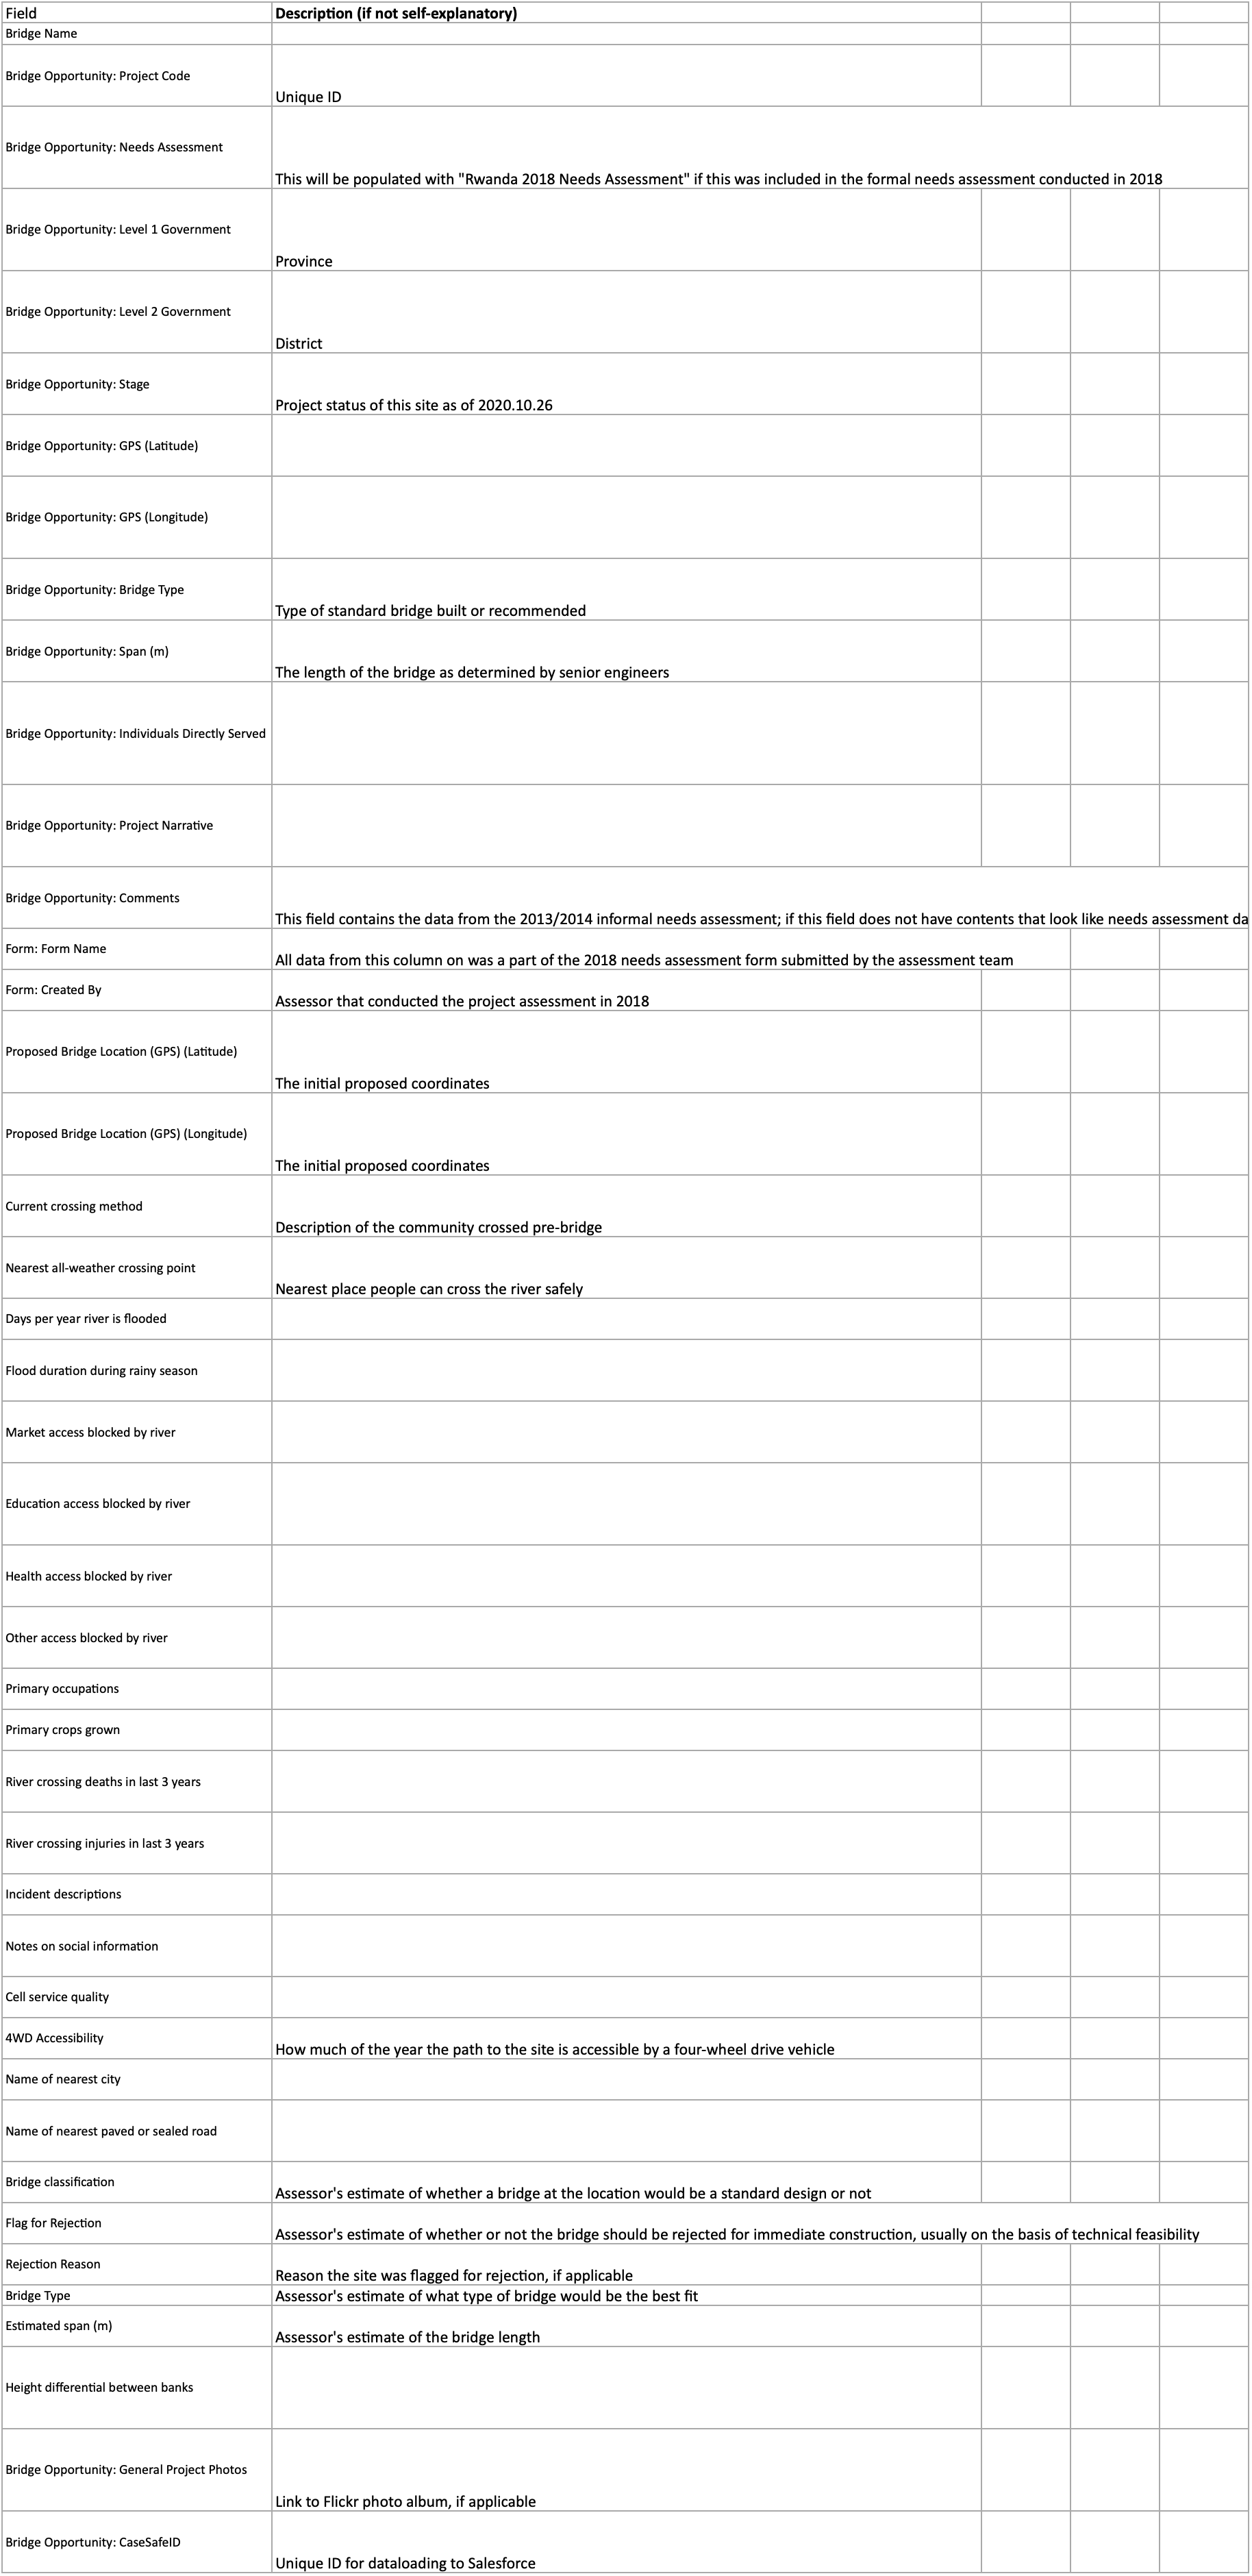

In [64]:
df[['Bridge Opportunity: Stage', 'Flag for Rejection', 'Rejection Reason', 'Senior Engineering Review Conducted']][(df['Senior Engineering Review Conducted'] == 'Yes') & (df['Flag for Rejection'] == 'Yes')]

,Bridge Opportunity: Stage,Flag for Rejection,Rejection Reason,Senior Engineering Review Conducted
0,Cancelled,Yes,There is a planned vehicular road with a vehic...,Yes
5,Complete,Yes,There is river confluence 20m away that will b...,Yes
354,Rejected,Yes,No back stay distance as the bridge is close t...,Yes
474,Rejected,Yes,On right side there is a wetland of 300 meters...,Yes


In [65]:
df[['Bridge Opportunity: Stage','Flag for Rejection']][df['Senior Engineering Review Conducted'] == 'Yes'].value_counts()

Bridge Opportunity: Stage  Flag for Rejection
Complete                   No                    27
Rejected                   No                    17
Prospecting                No                    16
Rejected                   Yes                    2
Confirmed                  No                     2
Complete                   Yes                    1
Cancelled                  Yes                    1
dtype: int64

In [66]:
 df[['Bridge Opportunity: Stage','Flag for Rejection']][df['Senior Engineering Review Conducted'] != 'Yes'].value_counts()

Bridge Opportunity: Stage  Flag for Rejection
Rejected                   No                    778
                           Yes                   243
Identified                 No                    178
Under Construction         No                      6
Identified                 Yes                     1
dtype: int64

In [67]:
df.sample(3, random_state=42, axis=0)

,Bridge Name,Bridge Opportunity: Project Code,Bridge Opportunity: Needs Assessment,Bridge Opportunity: Level 1 Government,Bridge Opportunity: Level 2 Government,Bridge Opportunity: Stage,Bridge Opportunity: GPS (Latitude),Bridge Opportunity: GPS (Longitude),Bridge Opportunity: Bridge Type,Bridge Opportunity: Span (m),Bridge Opportunity: Individuals Directly Served,Bridge Opportunity: Comments,Form: Form Name,Form: Created By,Proposed Bridge Location (GPS) (Latitude),Proposed Bridge Location (GPS) (Longitude),Current crossing method,Nearest all-weather crossing point,Days per year river is flooded,Flood duration during rainy season,Market access blocked by river,Education access blocked by river,Health access blocked by river,Other access blocked by river,Primary occupations,Primary crops grown,River crossing deaths in last 3 years,River crossing injuries in last 3 years,Incident descriptions,Notes on social information,Cell service quality,4WD Accessibility,Name of nearest city,Name of nearest paved or sealed road,Bridge classification,Flag for Rejection,Rejection Reason,Bridge Type,Estimated span (m),Height differential between banks,Bridge Opportunity: General Project Photos,Bridge Opportunity: CaseSafeID,Senior Engineering Review Conducted
852,Ruhengeri 2,1013633,Rwanda Needs Assessment 2018,Western Province,Rutsiro,Rejected,-1.88027,29.342770,NaN,NaN,519.0,NaN,Project Assessment - 2018.9.27,cesarngenzi taroworks,-1.88027,29.342770,Timber bridge,I have assessed another pedestrian bridge in 4...,28.0,30 minutes,Gakeri,None,None,None,Farming,Potatoes,2.0,1.0,A child has fell in the river but fortunately ...,The community of ruhengeri village cross to vi...,Good,Never,Gakeri,Rubavu-Rubengera,Standard,No,NaN,Suspended,50.0,NaN,NaN,006f100000d7iRnAAI,NaN
184,Kabira1,1013646,Rwanda Needs Assessment 2018,Western Province,Rutsiro,Identified,-1.97750,29.381944,NaN,NaN,2794.0,NaN,Project Assessment - 2018.9.27,cesarngenzi taroworks,-1.97750,29.381944,None,None,28.0,Thirty minutes,Congo Nile,Groupe scolaire de la paix,Congo Nile health center,ADPR in mucyebera,Farming,Cassava and beans,0.0,3.0,Olde women fell in coming from their farms,"Market(gishushu, kabiraho,), Sec school (gishu...",Good,Never,Congo Nile,Rubavu-rubengera,Standard,No,NaN,Suspended,53.0,NaN,NaN,006f100000d7iVzAAI,NaN
1261,Kinyinya,1014347,Rwanda Needs Assessment 2018,Western Province,Karongi,Rejected,-2.07245,29.604690,NaN,NaN,3105.0,NaN,Project Assessment - 2018.11.18,edouardumwanzuro taroworks,-2.07245,29.604690,None,None,98.0,2 hours of flood,"Mwunguzi village, Kirehe village, nzobe villag...","Mwunguzi village, Kirehe village, nzobe villag...","Mwunguzi village, Kirehe village, nzobe villag...","Mwunguzi village, Kirehe village, nzobe villag...",Farming,"Potatoes, beans",0.0,1.0,One injury across this river,mwunguzi broadcast officer provided info about...,Fair,Never,Karongi,Karongi - Muhanga,Standard,No,NaN,Suspension,33.0,NaN,NaN,006f100000eeuuOAAQ,NaN


In [68]:
df.isnull().sum()

Bridge Name                                           0
Bridge Opportunity: Project Code                      0
Bridge Opportunity: Needs Assessment                 40
Bridge Opportunity: Level 1 Government                0
Bridge Opportunity: Level 2 Government                0
Bridge Opportunity: Stage                             0
Bridge Opportunity: GPS (Latitude)                   12
Bridge Opportunity: GPS (Longitude)                  12
Bridge Opportunity: Bridge Type                    1287
Bridge Opportunity: Span (m)                       1082
Bridge Opportunity: Individuals Directly Served       6
Bridge Opportunity: Comments                       1078
Form: Form Name                                       0
Form: Created By                                      0
Proposed Bridge Location (GPS) (Latitude)            40
Proposed Bridge Location (GPS) (Longitude)           40
Current crossing method                             160
Nearest all-weather crossing point              

**"Bridge Opportunity: Bridge Type", "Bridge Type"**

In [69]:
# We remove "Bridge Opportunity: Bridge Type" column as it's mostly NaN
df['Bridge Type'].value_counts()

Suspension    648
Suspended     608
Other          46
Name: Bridge Type, dtype: int64

In [70]:
# change Suspended to Suspension
# df['Bridge Type'] = df['Bridge Type'].apply(lambda x: 'Suspension' if x == 'Suspended' else x)

**"Bridge Opportunity: Span (m)", "Estimated span (m)"**

* What is the difference between 'Estimated span (m)' and 'Bridge Opportunity: Span (m)'? The numbers do not go together. 

In [71]:
df['Bridge Opportunity: Span (m)'].value_counts()

10.0     24
35.0     18
40.0     16
45.0     14
50.0     13
         ..
38.0      1
112.0     1
104.0     1
850.0     1
54.0      1
Name: Bridge Opportunity: Span (m), Length: 110, dtype: int64

In [72]:
df['Estimated span (m)'].value_counts()

30.0    178
40.0     73
32.0     51
60.0     46
50.0     42
       ... 
41.2      1
53.4      1
55.4      1
38.4      1
56.2      1
Name: Estimated span (m), Length: 231, dtype: int64

In [73]:
df['Estimated span (m)'][df['Bridge Opportunity: Span (m)'] == 10.0]

69     55.0
77     40.0
79     37.0
306    47.4
313    54.4
316    44.0
321    39.0
331    31.0
336    60.0
337     NaN
370     NaN
372    66.0
386    53.0
393    37.0
394    49.0
400    40.0
406    60.0
410    56.5
418     NaN
422    38.0
423     NaN
442    88.4
471    90.0
472    64.0
Name: Estimated span (m), dtype: float64

** "Bridge Opportunity: GPS (Latitude)/Longtitue", "Proposed Bridge Location (GPS) (Latitude)"/Longtitude, **

In [74]:
df[["Proposed Bridge Location (GPS) (Latitude)", "Bridge Opportunity: GPS (Latitude)"]]

,Proposed Bridge Location (GPS) (Latitude),Bridge Opportunity: GPS (Latitude)
0,-2.760833,-2.760833
1,-2.322534,-2.322534
2,NaN,-2.513333
3,-2.476407,-2.476407
4,-2.233574,-2.233022
...,...,...
1467,-2.049360,-2.049360
1468,-2.209007,-2.209275
1469,-2.147630,-2.147630
1470,-2.133330,-2.133330


In [75]:
# The proposed columns can be dropped
df[["Proposed Bridge Location (GPS) (Latitude)", "Bridge Opportunity: GPS (Latitude)"]][df["Bridge Opportunity: GPS (Latitude)"].isna()]

,Proposed Bridge Location (GPS) (Latitude),Bridge Opportunity: GPS (Latitude)
103,NaN,NaN
266,NaN,NaN
476,NaN,NaN
621,NaN,NaN
672,NaN,NaN
681,NaN,NaN
682,NaN,NaN
683,NaN,NaN
684,NaN,NaN
832,NaN,NaN


In [76]:
# na_indx = df.index[df["Bridge Opportunity: GPS (Latitude)"].isna()]
# df["Bridge Opportunity: GPS (Latitude)"][na_indx] = df["Proposed Bridge Location (GPS) (Latitude)"][na_indx]
# df["Bridge Opportunity: GPS (Latitude)"].isna().sum()

**"Bridge Opportunity: Comments"**

In [77]:
df["Bridge Opportunity: Comments"][~df["Bridge Opportunity: Comments"].isna()]

0                   Steep slopes to deal with for anchors
2       Likely piloting steel decking on this bridge. ...
3       3000-6000 people directly served, Elevation:21...
4       Not Duplicate 500-1000 people directly served,...
5       Not Duplicate 3000-6000 people directly served...
                              ...                        
1323    ARK set stage as REJECTED due to an active ups...
1463    ARK - Rejecting bridge due to worsening upstre...
1465    500-1000 people directly served, Elevation:174...
1466    3000-6000 people directly served, Elevation:15...
1471    Was a duplicate site (specifically, an alterna...
Name: Bridge Opportunity: Comments, Length: 394, dtype: object

** "Form: Form Name" **

In [78]:
df["Form: Form Name"]

0       Project Assessment - 2018.10.10
1        Project Assessment - 2017.7.12
2        Project Assessment - 2018.7.27
3         Project Assessment - 2018.9.1
4         Project Assessment - 2018.9.4
                     ...               
1467     Project Assessment - 2018.8.25
1468    Project Assessment - 2018.10.28
1469    Project Assessment - 2018.10.28
1470    Project Assessment - 2018.10.28
1471    Project Assessment - 2018.10.14
Name: Form: Form Name, Length: 1472, dtype: object

** "Form: Created By" **

In [79]:
df["Form: Created By"]

0       aimablengirabakunzi taroworks
1                       Stephanie May
2          etiennemutebutsi taroworks
3       aimablengirabakunzi taroworks
4         dominiquehabimana taroworks
                    ...              
1467       edouardumwanzuro taroworks
1468    aimablengirabakunzi taroworks
1469       edouardumwanzuro taroworks
1470       edouardumwanzuro taroworks
1471       edouardumwanzuro taroworks
Name: Form: Created By, Length: 1472, dtype: object

** "Current crossing method" **

In [80]:
df["Current crossing method"].value_counts()

Timber                                                     398
None                                                       363
Timber bridge                                              181
Bridge in timber                                           109
Timbers                                                     57
                                                          ... 
Small logs in timber                                         1
No existing bridge                                           1
Four timber logs with crossing woods over                    1
People use cyperus papyrus fragment to cross the valley      1
Timber?                                                      1
Name: Current crossing method, Length: 118, dtype: int64

In [81]:
df["Current crossing method"] = df["Current crossing method"].apply(lambda x: "Timber" if 
                                    x in ["Timbers", "One timber", "Bridge in timber ( One log only)", "Bridge in timber (One log)", "Old timber",
                                          "Timber logs", "Timber crossing", "Two timbers", "7 timbers", "Timbet", "People use timbers to cross the river"]
                                    else "Timber Bridge" if x in ["Bridge in timber", "Timber bridge", "timber bridge"]
                                    else "Concrete" if x == "Concrete bridge"
                                    else "Boat" if x in ["Boats", "Crossing by a boat"]
                                    else "disrepair" if type(x) == str and bool(re.match(r".*disrepair.*", x))
                                    else "Fording" if x in ["fording and sometimes one single tree", "Walking through the river"]
                                    else "None" if x in ["none", "Nine"]
                                    else x)

** "Nearest all-weather crossing point" **

In [82]:
df["Nearest all-weather crossing point"][:10]

0                                                  NaN
1                                       2km downstream
2    Is located at 5km upstream. People pay 1000rwf...
3                                                 None
4                       Vehicular bridge, 5 kilometers
5                  vehicular is in two hours walk away
6                       Vehicular bridge in 45 minutes
7       RDF bridge within 40 minutes from yanza bridge
8                                                  6km
9    There is a vehicular bridge at Nyiragase , 3 h...
Name: Nearest all-weather crossing point, dtype: object

In [83]:
# column with multiple data types
df["Nearest all-weather crossing point"].apply(type).value_counts()

<class 'str'>      1287
<class 'float'>     184
<class 'int'>         1
Name: Nearest all-weather crossing point, dtype: int64

In [84]:
# make the entire column string
df["Nearest all-weather crossing point"] = df["Nearest all-weather crossing point"].apply(lambda x: str(x) if type(x) != str else x)

In [85]:
# Extract the quantities
mask = df["Nearest all-weather crossing point"].str.contains(r"([0-9.]+)(\s*)(?:(minutes)|(hours?)|(kilometers)|([kK]?[mM]))")
df["Nearest all-weather crossing point"][mask] = df["Nearest all-weather crossing point"][mask].str.replace(
    r'^([^0-9]*)([0-9.]+)(\s*)(?:(minutes)|(hours?)|(kilometers)|([kK]?[mM])).*$', r'\2 \4\5\6\7', regex=True)
df["Nearest all-weather crossing point"]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0                nan
1               2 km
2               5 km
3               None
4       5 kilometers
            ...     
1467        No point
1468           700 m
1469            None
1470            None
1471        No point
Name: Nearest all-weather crossing point, Length: 1472, dtype: object

** "river is flooded" **

In [86]:
df[["Days per year river is flooded", "Flood duration during rainy season"]]

,Days per year river is flooded,Flood duration during rainy season
0,NaN,NaN
1,120.0,12hours
2,60.0,1day
3,60.0,All time in April and May and it is rarely to ...
4,35.0,"April To May, September to December, 12 hours ..."
...,...,...
1467,35.0,Floods takes 7 hours
1468,50.0,"50times in April, May, October November and De..."
1469,280.0,"5 days of flood , this kiraro is very dangerous"
1470,270.0,1 day of flood


** "access blocked by river" **

In [87]:
df[["Market access blocked by river", "Education access blocked by river", "Health access blocked by river", "Other access blocked by river"]]

,Market access blocked by river,Education access blocked by river,Health access blocked by river,Other access blocked by river
0,NaN,NaN,NaN,NaN
1,"Schools, hospital, markets and government serv...",NaN,NaN,NaN
2,"Markets,farms blocked by this river both sides",Education blocked by this river both sides,Health services blocked by this river both sides,"Potable water, places of worship ,places for r..."
3,Markets,Primary and Secondary schools,Health Center,Churches and Government offices
4,"Birambo market, Gasura market, kirinda market(...","Groupe scholar Gasave( 1,2)","Kirinda Hospital(villages 1,2)",None
...,...,...,...,...
1467,Muhanga and Rutaka market,Rutaka ps,"Mata health center , gikomero health center",Muhanga district office
1468,"Gahororo, Musongati, Kibingo villages don't ha...","Gahororo, Musongati, Kibingo villages don't ha...","Gahororo, Musongati, Kibingo villages don't ha...",Cell office
1469,Rwankuba sector population don't have acess to...,"Mubuga sector ,twumba sector ,Gishyita sector ...","Mubuga sector ,twumba sector ,Gishyita sector ...","Mubuga sector ,twumba sector ,Gishyita sector ..."
1470,Wingwa village & Kigogwe village &Karambo vill...,Gasharu village people and some people from Ki...,Wingwa village & Kigogwe village &Karambo vill...,Wingwa village & Kigogwe village &Karambo vill...


**Primary products**

In [88]:
df[["Primary occupations", "Primary crops grown"]]

,Primary occupations,Primary crops grown
0,NaN,NaN
1,farming,banana
2,Farming and small business,"Corns, banana and beans"
3,"Farming of large tea plantation, wheat farms","Tea, cow pea, wheat, beans, sweet potatoes"
4,Farming,"Cassava, maize, beans, sorghum, sweet potatoes"
...,...,...
1467,Farming,"Potatoes , banana"
1468,"Farming of sweet potatoes, cassava, beans, maize","Sweet potatoes, beans, maize, cassava"
1469,Farming,"Banana , beans , maize"
1470,Farming,"Potatoes, banana"


In [89]:
df["Primary occupations"].value_counts()

Farming                                                                                                      451
Agriculture                                                                                                  161
Agriculture and animal husbandry                                                                              28
Firming                                                                                                       21
Farming and business                                                                                           8
                                                                                                            ... 
Farmers( Potatoes and vegetables on large scale) and cattle farmers, traders at Koran market                   1
School, health center, job, Market                                                                             1
Coffee Farmers, and workers of kaziba coffee factor                                             

In [90]:
df["Primary occupations"].apply(type).value_counts()

<class 'str'>      1260
<class 'float'>     212
Name: Primary occupations, dtype: int64

In [91]:
df["Primary occupations"].replace({"Firming": "Farming",
                                   "Farmers": "Farming",
                                   "School, Market, farms": "School, Market, Farms",
                                   "Market, school, farms,": "School, Market, Farms",
                                   "School, Market, farms,": "School, Market, Farms",
                                   "Farms, school, market": "School, Market, Farms",
                                   "School, farms, market": "School, Market, Farms",
                                   "Market, farms, schools": "School, Market, Farms",
                                   "School, farms, Market": "School, Market, Farms",
                                   "School, Market, farm": "School, Market, Farms",
                                   "School, farms, Market,": "School, Market, Farms",
                                   "School, Market and farms": "School, Market, Farms",
                                   "School, farms and market": "School, Market, Farms",
                                   "Market, schools, farms": "School, Market, Farms",

                                   "Market and farms": "Market and Farms",
                                   "Market, farms,": "Market and Farms",
                                   "Farming and marketing": "Market and Farms",
                                   }, inplace=True)
df["Primary occupations"].value_counts()[:20]

Farming                                              476
Agriculture                                          161
School, Market, Farms                                 40
Agriculture and animal husbandry                      28
Market and Farms                                       9
Farming and business                                   8
Agriculture and Brick making                           7
Farming and livestock                                  4
Tea farming and Animal keeping                         4
commerce, agriculture and Human-Powered Transport      3
School, Market,                                        3
Farming of sweet potatoes, banana, beans               3
Farming of sweet potatoes, banana, cassava             3
Rice farmers                                           2
Market, farms                                          2
Farming and mining                                     2
Market, school, health center, farms                   2
School, farms,                 

In [92]:
df["Primary crops grown"]

0                                                  NaN
1                                               banana
2                              Corns, banana and beans
3           Tea, cow pea, wheat, beans, sweet potatoes
4       Cassava, maize, beans, sorghum, sweet potatoes
                             ...                      
1467                                 Potatoes , banana
1468             Sweet potatoes, beans, maize, cassava
1469                            Banana , beans , maize
1470                                  Potatoes, banana
1471                       Banana , potatoes , Cassava
Name: Primary crops grown, Length: 1472, dtype: object

In [93]:
df["Primary crops grown"].unique().shape

(808,)

In [94]:
# re-arrange the values to reduce the value count
# Tokenize the strings, lower case, make singular
print(f'unique count before cleaning: {df["Primary crops grown"].unique().shape[0]}')
df["Primary crops grown"].fillna("", inplace=True)
df["Primary crops grown"] = df["Primary crops grown"].apply(
    lambda x: x.lower() if type(x)==str else x).apply(
        lambda x: [word.strip()[:re.search("(e?s?)$", word.strip()).start()] for word in x.replace("and", ",").split(',')])

df["Primary crops grown"] = df["Primary crops grown"].apply(lambda x: ", ".join(sorted(x)))

print(f'unique count after cleaning: {df["Primary crops grown"].unique().shape[0]}')
df["Primary crops grown"]

unique count before cleaning: 808
unique count after cleaning: 512


0                                                 
1                                           banana
2                               banana, bean, corn
3          bean, cow pea, sweet potato, tea, wheat
4       bean, cassava, maiz, sorghum, sweet potato
                           ...                    
1467                                banana, potato
1468             bean, cassava, maiz, sweet potato
1469                            banana, bean, maiz
1470                                banana, potato
1471                       banana, cassava, potato
Name: Primary crops grown, Length: 1472, dtype: object

** River crossing injuries/death in last 3 years **

In [95]:
# drop 'Incident descriptions' and 'Notes on social information',
df[["River crossing deaths in last 3 years","River crossing injuries in last 3 years", "Incident descriptions", "Notes on social information"]]

,River crossing deaths in last 3 years,River crossing injuries in last 3 years,Incident descriptions,Notes on social information
0,NaN,NaN,NaN,NaN
1,2.0,15.0,the injuries and deaths are caused by trying f...,Most of the facilities locate at the left side...
2,3.0,15.0,"Peoples dead when coming from the church, heal...","5 cells (kabuye,gasumba,kanyinya, buremera and..."
3,0.0,2.0,They slipped on trees and fall down in the river,"Market 1( Minaga, Gishwati, Mujerenge, Gikungu..."
4,4.0,4.0,Fell down and drowned,The population information of all adjacent com...
...,...,...,...,...
1467,0.0,5.0,No death,"Rutaka( Cyurutare village ), Mata health cente..."
1468,0.0,1.0,He drawn while trying to walk in the river for...,The social survey information were given by th...
1469,20.0,30.0,"Many people died across this kiraro river , nu...",Rubumba cell leader provided all info about in...
1470,1.0,0.0,"A cow died to this river , people get scared o...",Gasharu village provided info about directly i...


In [96]:
df[["Cell service quality", "4WD Accessibility", "Name of nearest city", "Name of nearest paved or sealed road"]]

,Cell service quality,4WD Accessibility,Name of nearest city,Name of nearest paved or sealed road
0,NaN,NaN,Huye,NaN
1,Fair,Seasonally,Kibogora-Kabuga,Karongi-Nyamasheke
2,Good,Never,Nyamagabe,Huye-Nyamagabe
3,Fair,Seasonally,Huye,Nyamagabe-Rusizi
4,Good,Never,Nyanza,Nyamagabe
...,...,...,...,...
1467,Fair,Seasonally,Muhanga,Ngororero-Muhanga
1468,Good,Seasonally,Karongi,Karongi-Rusizi
1469,Good,Never,Karongi,Karongi- Muhanga
1470,Fair,Never,Karongi,Karongi- Muhanga


In [97]:
print(df["Cell service quality"].unique())
print(df["4WD Accessibility"].unique())

[nan 'Fair' 'Good' 'Nonexistent']
[nan 'Seasonally' 'Never' 'Year Round']


In [98]:
df["Name of nearest city"].value_counts()

Huye         216
Musanze      148
Kigali       130
Karongi      117
Rusizi        87
            ... 
Congo-nil      1
Nhakabuye      1
KIgali         1
Huhe           1
Gitarama       1
Name: Name of nearest city, Length: 96, dtype: int64

In [99]:
df["Name of nearest paved or sealed road"].value_counts()

NR1 (Kigali-Huye-Akanyaru)    77
Nyamagabe-Rusizi              57
Kigali-musanze                51
Karongi-Rusizi                44
Rubavu-Rubengera              42
                              ..
Kigali_Gatuna                  1
Kigali~ Muhanga                1
Kigali-                        1
Nyamasheke~ karongi            1
Kabuga_rwamagana               1
Name: Name of nearest paved or sealed road, Length: 293, dtype: int64

In [100]:
df["Bridge classification"].value_counts(dropna=False)

Standard                                1239
NaN                                      177
Requires additional engineering           36
Outside of current engineering scope      20
Name: Bridge classification, dtype: int64

In [101]:
df["Flag for Rejection"].value_counts(dropna=False)

No     1024
Yes     248
NaN     200
Name: Flag for Rejection, dtype: int64

In [102]:
# Height differential between banks                   965
# Bridge Opportunity: General Project Photos         1426
# Bridge Opportunity: CaseSafeID                        0
# Senior Engineering Review Conducted 

In [103]:
df["Height differential between banks"].value_counts(dropna=False)

NaN      965
0.20      76
0.00      48
0.30      40
0.50      31
0.70      30
0.10      29
0.40      28
0.80      20
0.90      17
1.00      17
0.60      17
1.70      15
1.10      15
1.50      13
1.30      10
2.10       8
2.30       8
1.40       8
1.60       8
1.20       7
1.80       5
3.90       5
2.50       4
3.30       4
2.70       4
1.90       3
5.50       3
2.60       3
2.40       3
3.40       2
3.10       2
4.50       2
2.90       2
2.00       2
4.90       2
5.70       2
7.30       1
4.30       1
5.80       1
3.00       1
1.59       1
56.00      1
3.20       1
4.40       1
4.00       1
4.70       1
5.30       1
4.80       1
2.80       1
2.20       1
Name: Height differential between banks, dtype: int64

In [104]:
# seems to be a typo for 56m
df["Height differential between banks"] = df["Height differential between banks"].replace(to_replace=56.00, value=5.60)

In [105]:
df["Bridge Opportunity: CaseSafeID"]

0       006f100000asFErAAM
1       006f100000a82QzAAI
2       006f100000a86DaAAI
3       006f100000a86F4AAI
4       006f100000a86FXAAY
               ...        
1467    006f100000d6wBoAAI
1468    006f100000d1fMsAAI
1469    006f100000d1fPrAAI
1470    006f100000d1fTFAAY
1471    006f100000fHAHXAA4
Name: Bridge Opportunity: CaseSafeID, Length: 1472, dtype: object

In [106]:
df["Senior Engineering Review Conducted"].value_counts(dropna=False)

NaN    1383
Yes      89
Name: Senior Engineering Review Conducted, dtype: int64

In [107]:
print(df.shape)
df.dtypes

(1472, 43)


Bridge Name                                         object
Bridge Opportunity: Project Code                    object
Bridge Opportunity: Needs Assessment                object
Bridge Opportunity: Level 1 Government              object
Bridge Opportunity: Level 2 Government              object
Bridge Opportunity: Stage                           object
Bridge Opportunity: GPS (Latitude)                 float64
Bridge Opportunity: GPS (Longitude)                float64
Bridge Opportunity: Bridge Type                     object
Bridge Opportunity: Span (m)                       float64
Bridge Opportunity: Individuals Directly Served    float64
Bridge Opportunity: Comments                        object
Form: Form Name                                     object
Form: Created By                                    object
Proposed Bridge Location (GPS) (Latitude)          float64
Proposed Bridge Location (GPS) (Longitude)         float64
Current crossing method                             obje

In [108]:
# To be decided: 'Estimated span (m)', 'Bridge Opportunity: Span (m)'
# columns to drop
drop_cols = ['Bridge Opportunity: General Project Photos', 
            #  'Bridge Opportunity: Bridge Type',
             'Form: Form Name',
             'Form: Created By',
            #  'Estimated span (m)',
             'Proposed Bridge Location (GPS) (Latitude)',
             'Proposed Bridge Location (GPS) (Longitude)',
             'Incident descriptions',
             'Notes on social information']

df = df.drop(columns=drop_cols)

In [109]:
df.head()

,Bridge Name,Bridge Opportunity: Project Code,Bridge Opportunity: Needs Assessment,Bridge Opportunity: Level 1 Government,Bridge Opportunity: Level 2 Government,Bridge Opportunity: Stage,Bridge Opportunity: GPS (Latitude),Bridge Opportunity: GPS (Longitude),Bridge Opportunity: Bridge Type,Bridge Opportunity: Span (m),Bridge Opportunity: Individuals Directly Served,Bridge Opportunity: Comments,Current crossing method,Nearest all-weather crossing point,Days per year river is flooded,Flood duration during rainy season,Market access blocked by river,Education access blocked by river,Health access blocked by river,Other access blocked by river,Primary occupations,Primary crops grown,River crossing deaths in last 3 years,River crossing injuries in last 3 years,Cell service quality,4WD Accessibility,Name of nearest city,Name of nearest paved or sealed road,Bridge classification,Flag for Rejection,Rejection Reason,Bridge Type,Estimated span (m),Height differential between banks,Bridge Opportunity: CaseSafeID,Senior Engineering Review Conducted
0,Bukinga,1009317,Rwanda Needs Assessment 2018,Southern Province,Nyaruguru,Cancelled,-2.760833,29.488056,Suspended Bridge,NaN,NaN,Steep slopes to deal with for anchors,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Huye,NaN,NaN,Yes,There is a planned vehicular road with a vehic...,NaN,NaN,NaN,006f100000asFErAAM,Yes
1,Kagarama,1007325,NaN,Western Province,Nyamasheke,Complete,-2.322534,29.141944,Suspension Bridge,48.0,4000.0,NaN,Timber Bridge,2 km,120.0,12hours,"Schools, hospital, markets and government serv...",NaN,NaN,NaN,farming,banana,2.0,15.0,Fair,Seasonally,Kibogora-Kabuga,Karongi-Nyamasheke,NaN,NaN,NaN,NaN,10.0,0.7,006f100000a82QzAAI,Yes
2,Karambi,1007374,NaN,Southern Province,Huye,Complete,-2.513333,29.612778,Suspension Bridge,50.0,12500.0,Likely piloting steel decking on this bridge. ...,Timber Bridge,5 km,60.0,1day,"Markets,farms blocked by this river both sides",Education blocked by this river both sides,Health services blocked by this river both sides,"Potable water, places of worship ,places for r...",Farming and small business,"banana, bean, corn",3.0,15.0,Good,Never,Nyamagabe,Huye-Nyamagabe,Standard,NaN,NaN,Suspension,45.0,1.0,006f100000a86DaAAI,Yes
3,Rugeti,1007466,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,Complete,-2.476407,29.420800,Suspension Bridge,68.0,4363.0,"3000-6000 people directly served, Elevation:21...",Timber,None,60.0,All time in April and May and it is rarely to ...,Markets,Primary and Secondary schools,Health Center,Churches and Government offices,"Farming of large tea plantation, wheat farms","bean, cow pea, sweet potato, tea, wheat",0.0,2.0,Fair,Seasonally,Huye,Nyamagabe-Rusizi,Standard,No,NaN,Suspended,47.4,1.1,006f100000a86F4AAI,Yes
4,Nyakabuye - Nkomane,1007495,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,Complete,-2.233022,29.575130,Suspension Bridge,78.0,2790.0,"Not Duplicate 500-1000 people directly served,...",Timber Bridge,5 kilometers,35.0,"April To May, September to December, 12 hours ...","Birambo market, Gasura market, kirinda market(...","Groupe scholar Gasave( 1,2)","Kirinda Hospital(villages 1,2)",None,Farming,"bean, cassava, maiz, sorghum, sweet potato",4.0,4.0,Good,Never,Nyanza,Nyamagabe,Standard,No,NaN,Suspended,90.0,1.1,006f100000a86FXAAY,Yes


In [110]:
df[df['Bridge Opportunity: Project Code'].str.match('[a-zA-Z]') == True]
# df['Bridge Opportunity: Project Code'] = df['Bridge Opportunity: Project Code'].astype(int)

,Bridge Name,Bridge Opportunity: Project Code,Bridge Opportunity: Needs Assessment,Bridge Opportunity: Level 1 Government,Bridge Opportunity: Level 2 Government,Bridge Opportunity: Stage,Bridge Opportunity: GPS (Latitude),Bridge Opportunity: GPS (Longitude),Bridge Opportunity: Bridge Type,Bridge Opportunity: Span (m),Bridge Opportunity: Individuals Directly Served,Bridge Opportunity: Comments,Current crossing method,Nearest all-weather crossing point,Days per year river is flooded,Flood duration during rainy season,Market access blocked by river,Education access blocked by river,Health access blocked by river,Other access blocked by river,Primary occupations,Primary crops grown,River crossing deaths in last 3 years,River crossing injuries in last 3 years,Cell service quality,4WD Accessibility,Name of nearest city,Name of nearest paved or sealed road,Bridge classification,Flag for Rejection,Rejection Reason,Bridge Type,Estimated span (m),Height differential between banks,Bridge Opportunity: CaseSafeID,Senior Engineering Review Conducted
42,Gasura,RW104,NaN,Kigali,Gasabo,Complete,-1.820833,30.113889,Suspension Bridge,44.0,7000.0,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,006f100000ZQRq3AAH,Yes
43,Kucyaruseke,RW127,NaN,Southern Province,Nyaruguru,Complete,-2.711764,29.557267,Suspended Bridge,79.0,3000.0,NaN,Log timber bridge,23 km,90.0,The river can flood 24 hours. No one crossing ...,On both sides there are markets and when the r...,NaN,NaN,NaN,"Farming, teaching, masons","bean, potato, tea",0.0,0.0,Fair,NaN,Huye,Butare-Burundi (NR19),NaN,NaN,NaN,NaN,6.0,0.3,006f100000Zs7KqAAJ,Yes


In [111]:
dfw = pd.read_excel("https://github.com/Lambda-School-Labs/bridges-to-prosperity-ds-d/blob/main/Data/Bridges%20Dataset_2020.01.14.xls?raw=true")

In [112]:
dfw.head()

,Country,Level 1 Government,Level 2 Government,Bridge Name,Project Code,B2P Fiscal Year,Stage,Individuals Directly Served,GPS (Latitude),GPS (Longitude),Bridge Type,Span (m),Project Type
0,Uganda,Eastern Region,Mbale,Kama,UG101,2018,Complete,5280.0,1.116330,34.252460,Suspended Bridge,90.0,B2P Built
1,Swaziland,NaN,NaN,Mbluzi-Myendle,GO108,2017,Complete,4000.0,-26.294120,31.271240,Suspended Bridge,73.0,B2P Supported
2,Panama,Ngäbe-Buglé,NaN,Llano Bonito,PA122,2017,Complete,1500.0,8.446314,-81.365675,Suspended Bridge,79.0,B2P Supported
3,Nicaragua,Jinotega,Santa María de Pantasma,Puente San Vicente N°1,1008677,2018,Complete,4000.0,13.435012,-85.783800,Suspension Bridge,67.8,B2P Built
4,Nicaragua,Matagalpa,Río Blanco,La Guitarrilla,1008691,2018,Complete,4000.0,13.122785,-85.236833,Suspension Bridge,77.5,B2P Built


In [113]:
df.columns

Index(['Bridge Name', 'Bridge Opportunity: Project Code',
       'Bridge Opportunity: Needs Assessment',
       'Bridge Opportunity: Level 1 Government',
       'Bridge Opportunity: Level 2 Government', 'Bridge Opportunity: Stage',
       'Bridge Opportunity: GPS (Latitude)',
       'Bridge Opportunity: GPS (Longitude)',
       'Bridge Opportunity: Bridge Type', 'Bridge Opportunity: Span (m)',
       'Bridge Opportunity: Individuals Directly Served',
       'Bridge Opportunity: Comments', 'Current crossing method',
       'Nearest all-weather crossing point', 'Days per year river is flooded',
       'Flood duration during rainy season', 'Market access blocked by river',
       'Education access blocked by river', 'Health access blocked by river',
       'Other access blocked by river', 'Primary occupations',
       'Primary crops grown', 'River crossing deaths in last 3 years',
       'River crossing injuries in last 3 years', 'Cell service quality',
       '4WD Accessibility', 'Name o

In [114]:
dfw.columns

Index(['Country', 'Level 1 Government', 'Level 2 Government', 'Bridge Name',
       'Project Code', 'B2P Fiscal Year', 'Stage',
       'Individuals Directly Served', 'GPS (Latitude)', 'GPS (Longitude)',
       'Bridge Type', 'Span (m)', 'Project Type'],
      dtype='object')

In [115]:
dfw = dfw.rename(columns={'Project Code': 'Bridge Opportunity: Project Code', 
                         'Level 1 Government': 'Bridge Opportunity: Level 1 Government',
                         'Level 2 Government': 'Bridge Opportunity: Level 2 Government',
                         'Stage': 'Bridge Opportunity: Stage',
                         'Individuals Directly Served': 'Bridge Opportunity: Individuals Directly Served',
                         'GPS (Latitude)': 'Bridge Opportunity: GPS (Latitude)',
                         'GPS (Longitude)': 'Bridge Opportunity: GPS (Longitude)',
                         'Bridge Type': 'Bridge Opportunity: Bridge Type',
                         'Span (m)': 'Bridge Opportunity: Span (m)'})

In [116]:
dfw.head()

,Country,Bridge Opportunity: Level 1 Government,Bridge Opportunity: Level 2 Government,Bridge Name,Bridge Opportunity: Project Code,B2P Fiscal Year,Bridge Opportunity: Stage,Bridge Opportunity: Individuals Directly Served,Bridge Opportunity: GPS (Latitude),Bridge Opportunity: GPS (Longitude),Bridge Opportunity: Bridge Type,Bridge Opportunity: Span (m),Project Type
0,Uganda,Eastern Region,Mbale,Kama,UG101,2018,Complete,5280.0,1.116330,34.252460,Suspended Bridge,90.0,B2P Built
1,Swaziland,NaN,NaN,Mbluzi-Myendle,GO108,2017,Complete,4000.0,-26.294120,31.271240,Suspended Bridge,73.0,B2P Supported
2,Panama,Ngäbe-Buglé,NaN,Llano Bonito,PA122,2017,Complete,1500.0,8.446314,-81.365675,Suspended Bridge,79.0,B2P Supported
3,Nicaragua,Jinotega,Santa María de Pantasma,Puente San Vicente N°1,1008677,2018,Complete,4000.0,13.435012,-85.783800,Suspension Bridge,67.8,B2P Built
4,Nicaragua,Matagalpa,Río Blanco,La Guitarrilla,1008691,2018,Complete,4000.0,13.122785,-85.236833,Suspension Bridge,77.5,B2P Built


In [117]:
dfw["Bridge Opportunity: Bridge Type"].value_counts()

Suspended Bridge      241
Suspension Bridge      93
Simple Span Bridge      2
Other                   1
Name: Bridge Opportunity: Bridge Type, dtype: int64

In [119]:
for col in dfw.columns:
  if col not in df.columns:
    print(col)
  else:
    print("\t", col, "exists in df")

Country
	 Bridge Opportunity: Level 1 Government exists in df
	 Bridge Opportunity: Level 2 Government exists in df
	 Bridge Name exists in df
	 Bridge Opportunity: Project Code exists in df
B2P Fiscal Year
	 Bridge Opportunity: Stage exists in df
	 Bridge Opportunity: Individuals Directly Served exists in df
	 Bridge Opportunity: GPS (Latitude) exists in df
	 Bridge Opportunity: GPS (Longitude) exists in df
	 Bridge Opportunity: Bridge Type exists in df
	 Bridge Opportunity: Span (m) exists in df
Project Type


In [120]:
dfw['Country'].value_counts()

Rwanda           68
Nicaragua        60
Bolivia          57
Panama           29
Guatemala        25
Uganda           18
Ethiopia         15
Haiti            12
Honduras         11
Peru             10
Zambia            8
El Salvador       7
Timor-Leste       5
Swaziland         3
Philippines       2
Kenya             2
Nepal             2
Colombia          1
Sudan             1
Mozambique        1
Indonesia         1
United States     1
Name: Country, dtype: int64

In [121]:
df["Country"] = "Rwanda"
df.head()

,Bridge Name,Bridge Opportunity: Project Code,Bridge Opportunity: Needs Assessment,Bridge Opportunity: Level 1 Government,Bridge Opportunity: Level 2 Government,Bridge Opportunity: Stage,Bridge Opportunity: GPS (Latitude),Bridge Opportunity: GPS (Longitude),Bridge Opportunity: Bridge Type,Bridge Opportunity: Span (m),Bridge Opportunity: Individuals Directly Served,Bridge Opportunity: Comments,Current crossing method,Nearest all-weather crossing point,Days per year river is flooded,Flood duration during rainy season,Market access blocked by river,Education access blocked by river,Health access blocked by river,Other access blocked by river,Primary occupations,Primary crops grown,River crossing deaths in last 3 years,River crossing injuries in last 3 years,Cell service quality,4WD Accessibility,Name of nearest city,Name of nearest paved or sealed road,Bridge classification,Flag for Rejection,Rejection Reason,Bridge Type,Estimated span (m),Height differential between banks,Bridge Opportunity: CaseSafeID,Senior Engineering Review Conducted,Country
0,Bukinga,1009317,Rwanda Needs Assessment 2018,Southern Province,Nyaruguru,Cancelled,-2.760833,29.488056,Suspended Bridge,NaN,NaN,Steep slopes to deal with for anchors,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Huye,NaN,NaN,Yes,There is a planned vehicular road with a vehic...,NaN,NaN,NaN,006f100000asFErAAM,Yes,Rwanda
1,Kagarama,1007325,NaN,Western Province,Nyamasheke,Complete,-2.322534,29.141944,Suspension Bridge,48.0,4000.0,NaN,Timber Bridge,2 km,120.0,12hours,"Schools, hospital, markets and government serv...",NaN,NaN,NaN,farming,banana,2.0,15.0,Fair,Seasonally,Kibogora-Kabuga,Karongi-Nyamasheke,NaN,NaN,NaN,NaN,10.0,0.7,006f100000a82QzAAI,Yes,Rwanda
2,Karambi,1007374,NaN,Southern Province,Huye,Complete,-2.513333,29.612778,Suspension Bridge,50.0,12500.0,Likely piloting steel decking on this bridge. ...,Timber Bridge,5 km,60.0,1day,"Markets,farms blocked by this river both sides",Education blocked by this river both sides,Health services blocked by this river both sides,"Potable water, places of worship ,places for r...",Farming and small business,"banana, bean, corn",3.0,15.0,Good,Never,Nyamagabe,Huye-Nyamagabe,Standard,NaN,NaN,Suspension,45.0,1.0,006f100000a86DaAAI,Yes,Rwanda
3,Rugeti,1007466,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,Complete,-2.476407,29.420800,Suspension Bridge,68.0,4363.0,"3000-6000 people directly served, Elevation:21...",Timber,None,60.0,All time in April and May and it is rarely to ...,Markets,Primary and Secondary schools,Health Center,Churches and Government offices,"Farming of large tea plantation, wheat farms","bean, cow pea, sweet potato, tea, wheat",0.0,2.0,Fair,Seasonally,Huye,Nyamagabe-Rusizi,Standard,No,NaN,Suspended,47.4,1.1,006f100000a86F4AAI,Yes,Rwanda
4,Nyakabuye - Nkomane,1007495,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,Complete,-2.233022,29.575130,Suspension Bridge,78.0,2790.0,"Not Duplicate 500-1000 people directly served,...",Timber Bridge,5 kilometers,35.0,"April To May, September to December, 12 hours ...","Birambo market, Gasura market, kirinda market(...","Groupe scholar Gasave( 1,2)","Kirinda Hospital(villages 1,2)",None,Farming,"bean, cassava, maiz, sorghum, sweet potato",4.0,4.0,Good,Never,Nyanza,Nyamagabe,Standard,No,NaN,Suspended,90.0,1.1,006f100000a86FXAAY,Yes,Rwanda


In [122]:
dfw.shape, df.shape

((339, 13), (1472, 37))

In [123]:
# Check for duplicate projects in dfw and df
print(dfw["Bridge Opportunity: Project Code"].isna().sum())
df["Bridge Opportunity: Project Code"].apply(lambda x: x in dfw["Bridge Opportunity: Project Code"]).sum()

0


0

In [124]:
df_new = pd.concat([df, dfw])
print(df_new.shape)
df_new.head()

(1811, 39)


,Bridge Name,Bridge Opportunity: Project Code,Bridge Opportunity: Needs Assessment,Bridge Opportunity: Level 1 Government,Bridge Opportunity: Level 2 Government,Bridge Opportunity: Stage,Bridge Opportunity: GPS (Latitude),Bridge Opportunity: GPS (Longitude),Bridge Opportunity: Bridge Type,Bridge Opportunity: Span (m),Bridge Opportunity: Individuals Directly Served,Bridge Opportunity: Comments,Current crossing method,Nearest all-weather crossing point,Days per year river is flooded,Flood duration during rainy season,Market access blocked by river,Education access blocked by river,Health access blocked by river,Other access blocked by river,Primary occupations,Primary crops grown,River crossing deaths in last 3 years,River crossing injuries in last 3 years,Cell service quality,4WD Accessibility,Name of nearest city,Name of nearest paved or sealed road,Bridge classification,Flag for Rejection,Rejection Reason,Bridge Type,Estimated span (m),Height differential between banks,Bridge Opportunity: CaseSafeID,Senior Engineering Review Conducted,Country,B2P Fiscal Year,Project Type
0,Bukinga,1009317,Rwanda Needs Assessment 2018,Southern Province,Nyaruguru,Cancelled,-2.760833,29.488056,Suspended Bridge,NaN,NaN,Steep slopes to deal with for anchors,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Huye,NaN,NaN,Yes,There is a planned vehicular road with a vehic...,NaN,NaN,NaN,006f100000asFErAAM,Yes,Rwanda,NaN,NaN
1,Kagarama,1007325,NaN,Western Province,Nyamasheke,Complete,-2.322534,29.141944,Suspension Bridge,48.0,4000.0,NaN,Timber Bridge,2 km,120.0,12hours,"Schools, hospital, markets and government serv...",NaN,NaN,NaN,farming,banana,2.0,15.0,Fair,Seasonally,Kibogora-Kabuga,Karongi-Nyamasheke,NaN,NaN,NaN,NaN,10.0,0.7,006f100000a82QzAAI,Yes,Rwanda,NaN,NaN
2,Karambi,1007374,NaN,Southern Province,Huye,Complete,-2.513333,29.612778,Suspension Bridge,50.0,12500.0,Likely piloting steel decking on this bridge. ...,Timber Bridge,5 km,60.0,1day,"Markets,farms blocked by this river both sides",Education blocked by this river both sides,Health services blocked by this river both sides,"Potable water, places of worship ,places for r...",Farming and small business,"banana, bean, corn",3.0,15.0,Good,Never,Nyamagabe,Huye-Nyamagabe,Standard,NaN,NaN,Suspension,45.0,1.0,006f100000a86DaAAI,Yes,Rwanda,NaN,NaN
3,Rugeti,1007466,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,Complete,-2.476407,29.420800,Suspension Bridge,68.0,4363.0,"3000-6000 people directly served, Elevation:21...",Timber,None,60.0,All time in April and May and it is rarely to ...,Markets,Primary and Secondary schools,Health Center,Churches and Government offices,"Farming of large tea plantation, wheat farms","bean, cow pea, sweet potato, tea, wheat",0.0,2.0,Fair,Seasonally,Huye,Nyamagabe-Rusizi,Standard,No,NaN,Suspended,47.4,1.1,006f100000a86F4AAI,Yes,Rwanda,NaN,NaN
4,Nyakabuye - Nkomane,1007495,Rwanda Needs Assessment 2018,Southern Province,Nyamagabe,Complete,-2.233022,29.575130,Suspension Bridge,78.0,2790.0,"Not Duplicate 500-1000 people directly served,...",Timber Bridge,5 kilometers,35.0,"April To May, September to December, 12 hours ...","Birambo market, Gasura market, kirinda market(...","Groupe scholar Gasave( 1,2)","Kirinda Hospital(villages 1,2)",None,Farming,"bean, cassava, maiz, sorghum, sweet potato",4.0,4.0,Good,Never,Nyanza,Nyamagabe,Standard,No,NaN,Suspended,90.0,1.1,006f100000a86FXAAY,Yes,Rwanda,NaN,NaN


In [125]:
df_new["Bridge Opportunity: Stage"].value_counts()

Rejected              1175
Complete               356
Identified             224
Under Construction      26
Prospecting             18
Confirmed               11
Cancelled                1
Name: Bridge Opportunity: Stage, dtype: int64